In [1]:
import pandas as pd
import numpy as np

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.impute import SimpleImputer
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import  Pipeline
from sklearn.ensemble import RandomForestClassifier


sns.set(color_codes=True)
plt.style.use('seaborn-muted')

In [5]:
credit_card_data = pd.read_csv('creditcard.csv')

In [3]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_card_data.Class.unique()

array([0, 1])

/Users/hijoes/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:grey'` for same effect.
  warnings.warn(msg, FutureWarning)
/Users/hijoes/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:grey'` for same effect.
  warnings.warn(msg, FutureWarning)


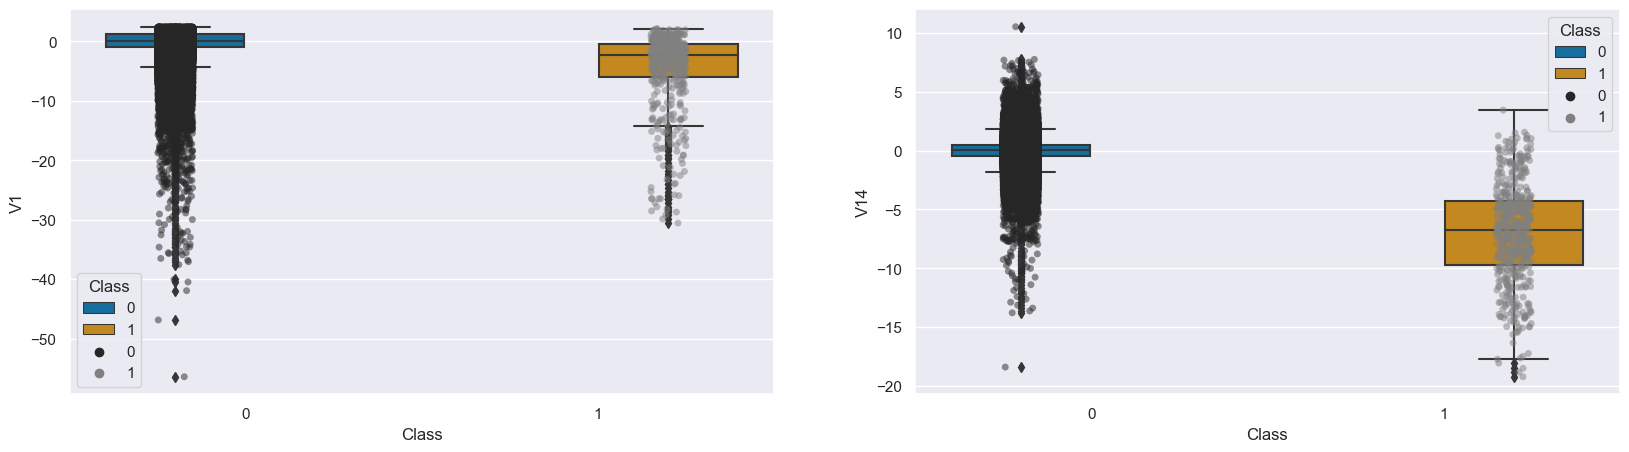

In [6]:
cols = ['V1', 'V14']
f, axes = plt.subplots(1, 2, figsize=(20, 5), sharex=True)
for index,col in enumerate(cols):
    sns.boxplot(x="Class", y=col, hue="Class", palette="colorblind", data=credit_card_data, ax=axes[index]) 
    sns.stripplot(x='Class', y=col,  data=credit_card_data,dodge=True,jitter=True,marker='o',ax=axes[index],alpha=0.5,color='grey',hue='Class')
plt.show()
plt.clf()
plt.close()

/var/folders/p0/dpsjj8hd3ps5ccx9j68tktr40000gn/T/ipykernel_56497/2249149390.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_card_data['V3'],ax=axes[0])
/var/folders/p0/dpsjj8hd3ps5ccx9j68tktr40000gn/T/ipykernel_56497/2249149390.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credi

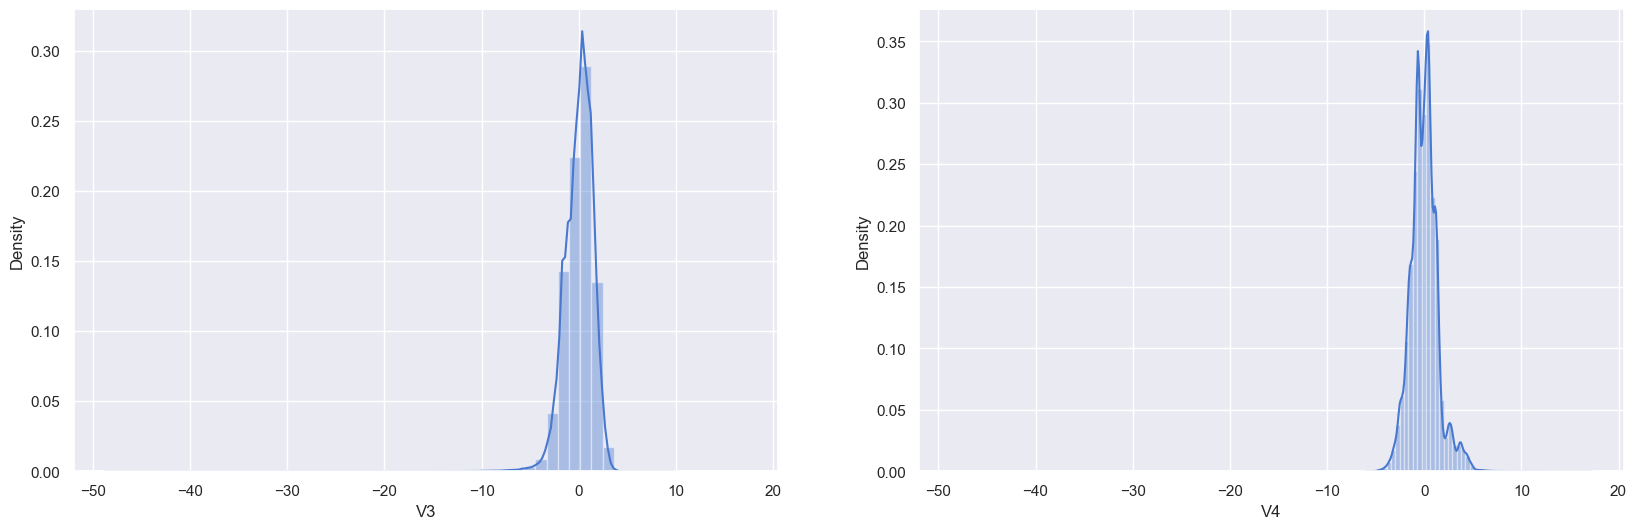

In [7]:
f, axes = plt.subplots(1, 2, figsize=(20, 6), sharex=True)
sns.distplot(credit_card_data['V3'],ax=axes[0])
sns.distplot(credit_card_data['V4'],ax=axes[1])

plt.show()
plt.clf()
plt.close()

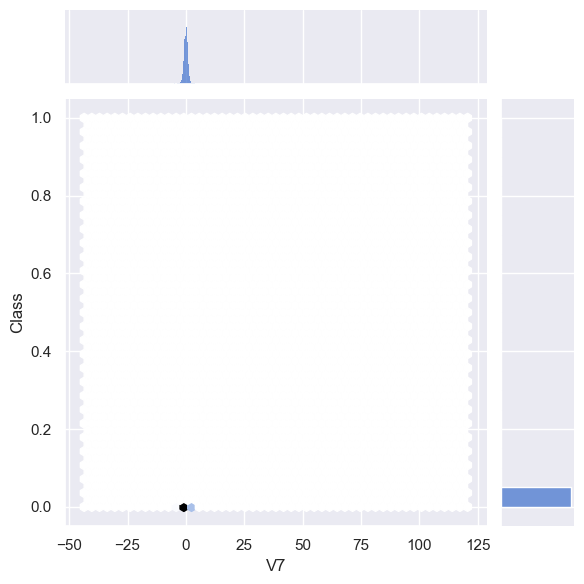

In [8]:
sns.jointplot(y='Class',x='V7',data=credit_card_data,kind='hex')

<AxesSubplot:>

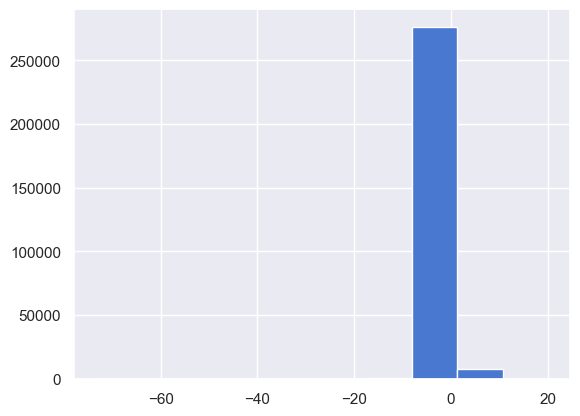

In [9]:
credit_card_data.V8.hist()

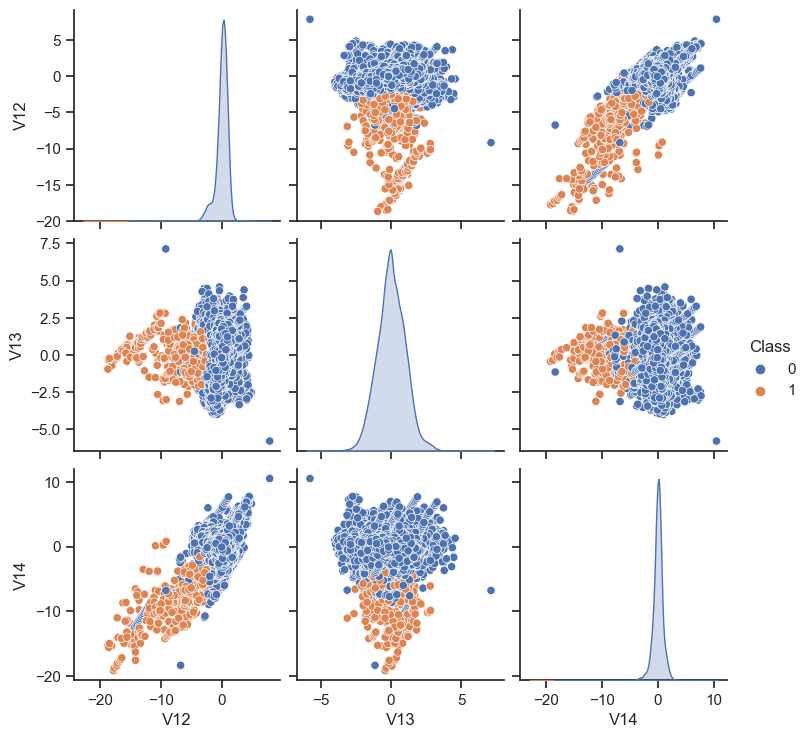

In [10]:
sns.set(style="ticks")
sns.pairplot(credit_card_data[["V12","V13","V14","Class"]], hue="Class")

#### Steps: Splitting data into 4 sets
1. Shuffle/randomize data
2. one-hot encoding
3. Normalize
4. Splitting up X/y values
5. Converting data frames to numpy array(float32)
6. splitting the final dta into X/y train/test

In [6]:
# 1
shuffle_data = credit_card_data.sample(frac=1)

In [7]:
# 2
one_hot_data = pd.get_dummies(shuffle_data, columns=["Class"])

In [8]:
# 3
normalized_data = (one_hot_data - one_hot_data.min()) / (one_hot_data.max() - one_hot_data.min())

In [15]:
# 4 
df_X = normalized_data.drop(['Class_0', 'Class_1'], axis=1)
df_y = normalized_data[['Class_0', 'Class_1']]

In [16]:
ar_X, ar_y = np.asarray(df_X.values, dtype='float32'), np.asarray(df_y.values, dtype='float32')

In [17]:
# training size
train_size = int(0.8*len(ar_X))

In [18]:
# 6
(raw_X_train, raw_y_train) = (ar_X[: train_size], ar_y[:train_size])
(raw_X_test, raw_y_test) = (ar_X[: train_size], ar_y[:train_size])

In [19]:
# removing bias from dataset
count_legit, count_fraud = np.unique(credit_card_data['Class'], return_counts=True)[1]

In [20]:
# percent ratio of legit and fraud data
fraud_ratio = float(count_fraud / (count_legit + count_fraud))

In [21]:
fraud_ratio

0.001727485630620034

In [23]:
# weighting 

weighting = 1 / fraud_ratio
weighting

578.8760162601626

In [24]:
raw_y_train[:, 1] = raw_y_train[:, 1] * weighting

In [30]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


In [31]:
# dimension of data set
input_dimension = ar_X.shape[1]
out_dimension = ar_y.shape[1]

In [32]:
num_layer_1_cells = 100
num_layer_2_cells = 150

In [33]:
X_train_node = tf.placeholder(tf.float32, [None, input_dimension], name="X_train")
y_train_node = tf.placeholder(tf.float32, [None, out_dimension], name="y_train")

In [34]:
X_test_node = tf.constant(raw_X_test, name="X_test")
y_test_node = tf.constant(raw_y_test, name="y_test")

In [35]:
weigh_1_node = tf.Variable(tf.zeros([input_dimension, num_layer_1_cells]), name="weight_1")
biases_1_node = tf.Variable(tf.zeros([num_layer_1_cells]), name="biases_1")

In [36]:
weigh_2_node = tf.Variable(tf.zeros([num_layer_1_cells, num_layer_2_cells]), name="weight_2")
biases_2_node = tf.Variable(tf.zeros([num_layer_2_cells]), name="biases_2")

In [37]:
weigh_3_node = tf.Variable(tf.zeros([num_layer_2_cells, out_dimension]), name="weight_3")
biases_3_node = tf.Variable(tf.zeros([out_dimension]), name="biases_3")

In [38]:
def network(input_tensor):
    layer1 = tf.nn.sigmoid(tf.matmul(input_tensor, weigh_1_node) + biases_1_node)
    layer2 = tf.nn.dropout(tf.nn.sigmoid(tf.matmul(layer1, weigh_2_node) + biases_2_node), 0.85)
    layer3 = tf.nn.softmax(tf.matmul(layer2, weigh_3_node) + biases_3_node)

    return layer3


y_train_prediction = network(X_train_node)
y_test_prediction = network(X_test_node)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [39]:
cross_entropy = tf.losses.softmax_cross_entropy(y_train_node, y_train_prediction)

In [40]:
# cross entropy which is our loss
optimizer = tf.train.AdamOptimizer(0.005).minimize(cross_entropy)

In [41]:
def calculate_accuracy(actual, predicted):
    actual = np.argmax(actual, 1)
    predicted = np.argmax(predicted, 1)
    return 100 * np.sum(np.equal(predicted, actual) / predicted.shape[0])

In [42]:
num_epochs = 100

In [43]:
import time

In [47]:
with tf.Session() as session:
    tf.global_variables_initializer().run()
    for epoch in range(num_epochs):

        start_time = time.time()

        _, cross_entropy_score = session.run([optimizer, cross_entropy], feed_dict={X_train_node: raw_X_train, y_train_node: raw_y_train})

        if epoch % 10 == 0:
            timer = time.time() - start_time

            print('Epoch: {}'.format(epoch), 'Current loss: {0:.4f}'.format(cross_entropy_score), 'Elapsed time: {0:.2f} seconds'.format(timer))

            final_y_test = y_test_node.eval()
            final_y_test_prediction = y_test_prediction.eval()
            final_accuracy = calculate_accuracy(final_y_test, final_y_test_prediction)
            print("Current accuracy: {0:.2f}%".format(final_accuracy))
    final_y_test = y_test_node.eval()
    final_y_test_prediction = y_test_prediction.eval()
    final_accuracy = calculate_accuracy(final_y_test, final_y_test_prediction)
    print("Final accuracy: {0:.2f}%".format(final_accuracy))

final_fraud_y_test = final_y_test[final_y_test[:, 1] == 1]
final_fraud_y_test_prediction = final_y_test_prediction[final_y_test[:, 1] == 1]
final_fraud_accuracy = calculate_accuracy(final_fraud_y_test, final_fraud_y_test_prediction)
print("Final fraud specific accuracy: {0:.2f}%".format(final_fraud_accuracy))

Epoch: 0 Current loss: 1.4087 Elapsed time: 1.00 seconds
Current accuracy: 0.18%
Epoch: 10 Current loss: 1.4118 Elapsed time: 0.71 seconds
Current accuracy: 0.18%
Epoch: 20 Current loss: 1.4023 Elapsed time: 0.72 seconds
Current accuracy: 0.18%
Epoch: 30 Current loss: 1.3672 Elapsed time: 0.69 seconds
Current accuracy: 0.19%
Epoch: 40 Current loss: 1.2446 Elapsed time: 0.68 seconds
Current accuracy: 75.96%
Epoch: 50 Current loss: 1.0845 Elapsed time: 0.68 seconds
Current accuracy: 95.62%
Epoch: 60 Current loss: 0.9684 Elapsed time: 0.69 seconds
Current accuracy: 97.67%
Epoch: 70 Current loss: 0.9140 Elapsed time: 0.85 seconds
Current accuracy: 98.80%
Epoch: 80 Current loss: 0.8882 Elapsed time: 0.68 seconds
Current accuracy: 99.28%
Epoch: 90 Current loss: 0.8608 Elapsed time: 0.67 seconds
Current accuracy: 99.40%
Final accuracy: 99.41%
Final fraud specific accuracy: 0.00%
